# Student Grades Prediction

In [1]:
# # Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df=pd.read_csv("grades.csv")
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

We can notice that the grade dataset contains 571 rows and 43 columns in which 'seat no' represents the enrolled number of the candidate booked for exam. that last column is CGPA which is the cumulative GPA based on the four year total grade progress of each candidate. and otherthan these two column all are the examination paper name.

In [3]:
# checking column names
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
# Checking No of column present
print("Number of column present =",len(df.columns))

Number of column present = 43


In [5]:
# Checking Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Observation:
The dataset is a pandas DataFrame type data which contains 571 entities indexing from 0 to 570.
There are 43 column present in the dataset which is indexed from 0 to 43.
There are some missing data present as the count of non null is not same for each column.
All the column possesses object type data except CGPA column which is float type data. 

In [6]:
# Checking Missing data present in the dataset
print(df.isnull().sum())

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


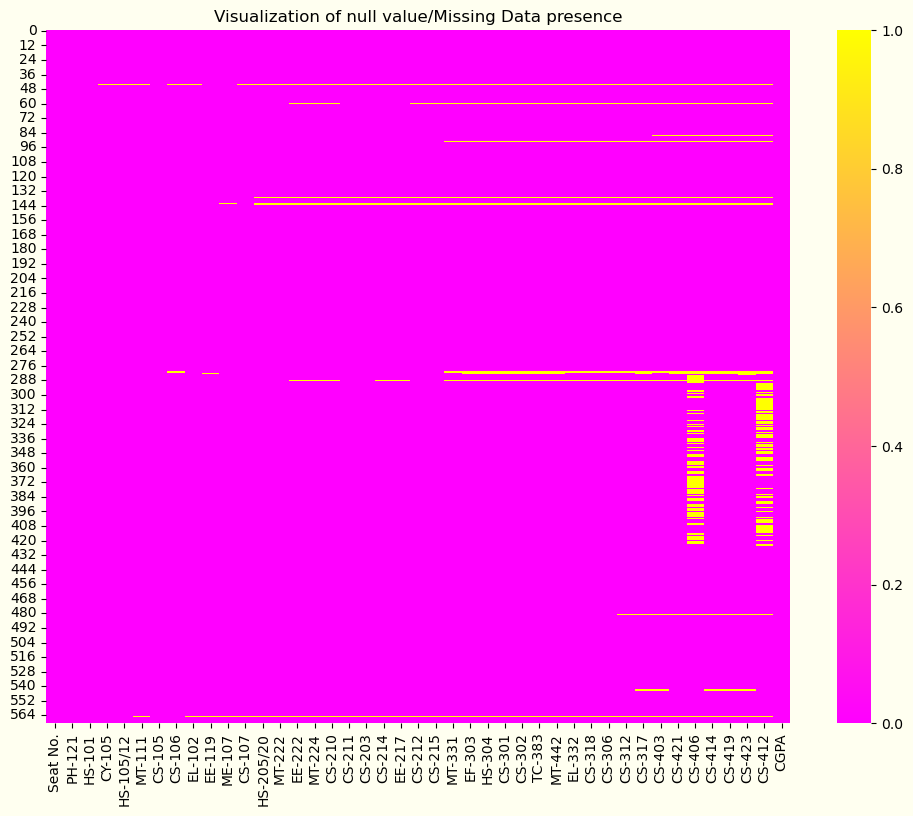

In [7]:
# Visualizing missing data
plt.figure(figsize=(12,9), facecolor='ivory')
sns.heatmap(df.isnull(),cmap="spring")
plt.title("Visualization of null value/Missing Data presence")
plt.show()

There are some missing value present. As all the data is object datatype then we need to replace all missing data with mode value.

In [8]:
# Checking no of unique value
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

we can notice the number of unique value presents in the dataset.

In [9]:
# checking for unique value 
for i in df.columns:
    print(df[i].value_counts())

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B

We can notice the unique values in each column with its countings. hence it clear that all objective data in every subject of examination possess a grading namely A,A+,A-,B,B+,B- etc. and there are also some missing data present in the dataset. hence we need to replace all missing value with its mode.

In [10]:
# checking unique value in each column
for i in df.columns:
    print(i,":")
    print(df[i].unique(),"\n")

Seat No. :
['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-97

Now we can clearly notice that there are some nan value present in the dataset

In [11]:
# Handling Missing data/ nan data 
for col in df.columns[1:-1]:
    df[col]=df[col].replace(np.nan,df[col].mode()[0])
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now all missing value is replaced with its mode value. now visualize the dataset wheather any missing value is present or  not.

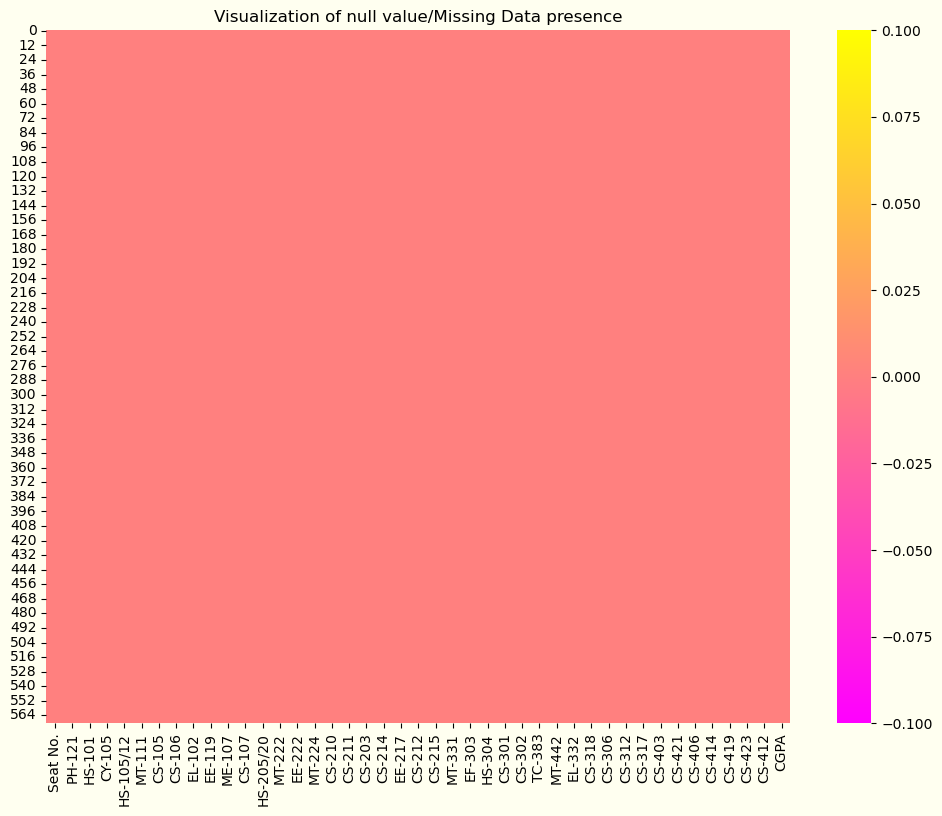

In [12]:
# Visualizing missing data
plt.figure(figsize=(12,9), facecolor='ivory')
sns.heatmap(df.isnull(),cmap="spring")
plt.title("Visualization of null value/Missing Data presence")
plt.show()

From the heatmap we can say that all missing value is repalced with its mode. and now there is no missing value present.

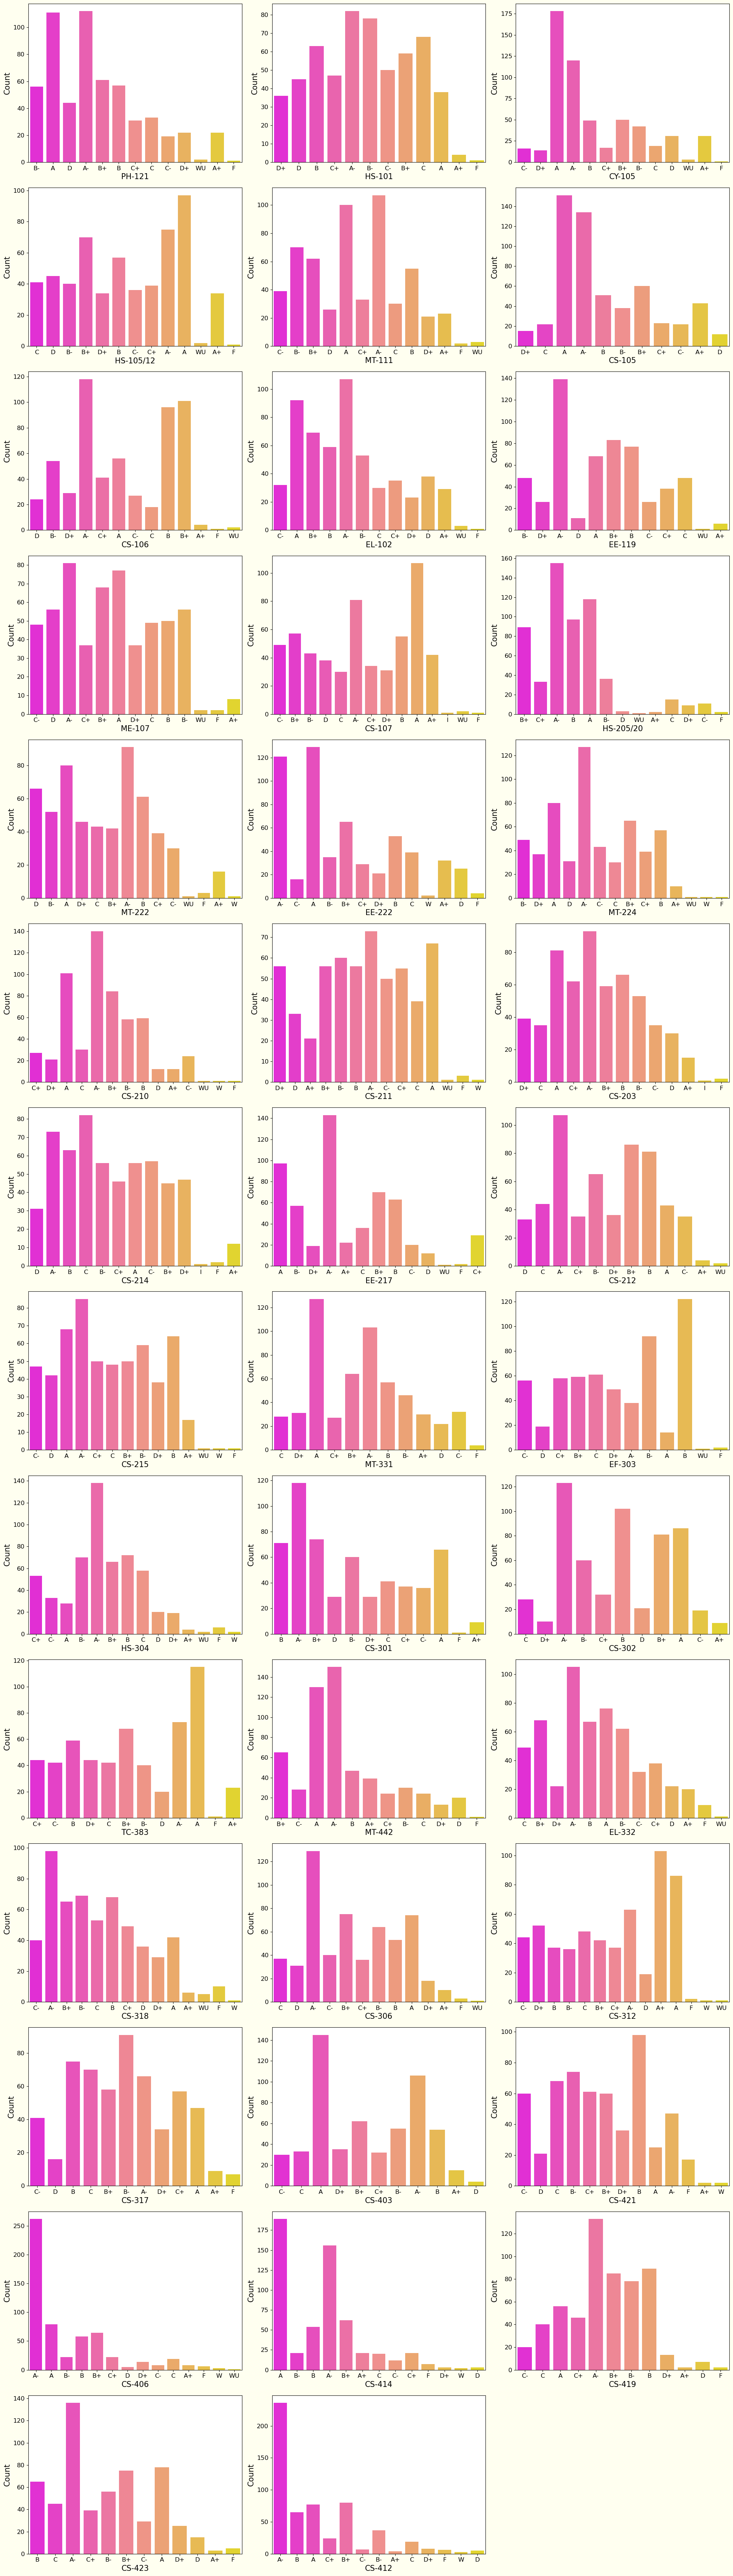

In [13]:
# Checking countplot for each subject paper
plotnumber=1
width=20
height=((41//3)+1)*5
plt.figure(figsize=(width,height),facecolor="ivory")
for i in df.columns[1:-1]:
    if plotnumber<=41:
        plt.subplot(14,3,plotnumber)
        sns.countplot(x=i, data=df, palette='spring')
        plt.xlabel(i, fontsize=15)
        plt.ylabel("Count", fontsize=15)
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the count plot we can notice that the most of the student gets which grade in which subjects. 
1. In PH-121 subject most of the student gets the grade of A,A-, B, B+,B- and D grade. There are few student whose who gets A+ grade and And very few student those who got F grade.
2. In HS-101 subject Most of the student gets A-, B-,C ,B,B+,C- A and D+ grade. There are few student those who got A+ grade and there are very few student those who got F grade.
3. In CY-105 subject most of the student gets A and A- grade. few student gets A+, B+, B-,B, D, C+ C-, D+ grade. and there are very few student gets WU and F grade.
4. In HS-105/12 subject most of the student got A, A-, B, B+, B-  grade. A few student got A+, C, C+,C-,D, D+ grade. Very Few student got WU and F grade.
5. In MT-111 subject Most of the student got A, A-, B+, B-, B grade. A few student got A+, C-, C+, D+, D grade. and very few student got F and WU grade
6. In CS-105 subject most of the student got A, A-, B+, B and A+ grade. Few student fot D+, C, B-, C+, C- and D grade. there is no F and WU grade student.
7. In CS-106 subject most of the student got A-, B, B+ and  A grade. A few student gets D, D+, C+, C, C-, A+ grade. and very few student got F and WU.
8. In EL-102 subject most of the student got A-, A, B+, B, B-, grade. A few student got C, C-, C+, D+, D, And A+ grade. Very few student gets F and WU grade.
9. In EE-119 subject Most of the Student got A-, B+, B, A, B-, C and B- grade. A few student gets D, D+, C-, C+ grade and very few student got WU and A+ grade.
10. In ME-107 subject most of the student got A, A-, B+, B, B-, C, C+, C-, D and D+ grade. Few student got A+ grade and very few student got WU and F frade.
11. In CS-107 subject most of the student got A, A-, B+, B grade. 

In this way we can visualize most no of student which grade in each subject.

In [14]:
# Assigning a grade number as per grade
grade={"F":0,
       "W":1,
       "WU":2,
       "D-":3,
       "D":4,
       "D+":5,
       "C-":6,
       "C":7,
       "C+":8,
       "B-":9,
       "B":10,
       "B+":11,
       "A-":12,
       "A":13,
       "A+":14,
       "I":15}

In [15]:
# Replacing object data of grade with its grade value in integer.
cleanup_grade={}
for i in df.columns[1:-1]:
    cleanup_grade[i]=grade
df1=df.replace(cleanup_grade)
df1.head()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001       9       5       6          7       6       5       4   
1  CS-97002      13       4       5          4       9       7       4   
2  CS-97003      13      10      13          9      11      13       9   
3  CS-97004       4       8       5          4       4      12       5   
4  CS-97005      12      12      12         11      13      13      12   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       6       9  ...       6       6       6       6      12      13   
1      13       5  ...       5       4       7       4      12       9   
2      11      12  ...      10      10      13       7      13      13   
3       6       4  ...       5       7       5       6       9      10   
4      11      13  ...       9      11      11       9      12      13   

   CS-419  CS-423  CS-412   CGPA  
0       6      10      12  2.205  
1       7       7      10  2.008  
2      13      12      13  3.608  
3       8       8       8  1.906  
4      12      12      13  3.448  

[5 rows x 43 columns]

In [16]:
# Checking Data tupes:
df1.dtypes

Seat No.      object
PH-121         int64
HS-101         int64
CY-105         int64
HS-105/12      int64
MT-111         int64
CS-105         int64
CS-106         int64
EL-102         int64
EE-119         int64
ME-107         int64
CS-107         int64
HS-205/20      int64
MT-222         int64
EE-222         int64
MT-224         int64
CS-210         int64
CS-211         int64
CS-203         int64
CS-214         int64
EE-217         int64
CS-212         int64
CS-215         int64
MT-331         int64
EF-303         int64
HS-304         int64
CS-301         int64
CS-302         int64
TC-383         int64
MT-442         int64
EL-332         int64
CS-318         int64
CS-306         int64
CS-312         int64
CS-317         int64
CS-403         int64
CS-421         int64
CS-406         int64
CS-414         int64
CS-419         int64
CS-423         int64
CS-412         int64
CGPA         float64
dtype: object

All subject data has been repaced from object with a integer value as per grade. now we can notice that the data type of all subject is integer data type. Seat no is unique objective data as per student enrollment no. Hence this Seat no column is not required for dada analysis purpose. hence we can drop that column.

In [17]:
# removing Seat No. column
df1.drop("Seat No.", axis=1, inplace=True)
df1

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         9       5       6          7       6       5       4       6   
1        13       4       5          4       9       7       4      13   
2        13      10      13          9      11      13       9      11   
3         4       8       5          4       4      12       5       6   
4        12      12      12         11      13      13      12      11   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      10      13      13         12      14      13      12      12   
567      14      13      13         13      13      13      13      12   
568      10      13      12         11      13      13      13      13   
569      13      11       4         13       4       5       9       6   
570       7       4       4          7       7       5      10       8   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         9       6  ...       6       6       6       6      12      13   
1         5       4  ...       5       4       7       4      12       9   
2        12      12  ...      10      10      13       7      13      13   
3         4       8  ...       5       7       5       6       9      10   
4        13      12  ...       9      11      11       9      12      13   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566      14      11  ...      12      12      13      13      13      11   
567      13      13  ...      11      11      13      13      12      10   
568      13      10  ...      12      10      13      11      13       7   
569       9       6  ...       4      10      10       6       4       7   
570       7       5  ...       8       7       9       4       0       6   

     CS-419  CS-423  CS-412   CGPA  
0         6      10      12  2.205  
1         7       7      10  2.008  
2        13      12      13  3.608  
3         8       8       8  1.906  
4        12      12      13  3.448  
..      ...     ...     ...    ...  
566      11      10      13  3.798  
567      12       7      12  3.772  
568      11      12      12  3.470  
569      10       9       7  2.193  
570      11       4       6  1.753  

[571 rows x 42 columns]

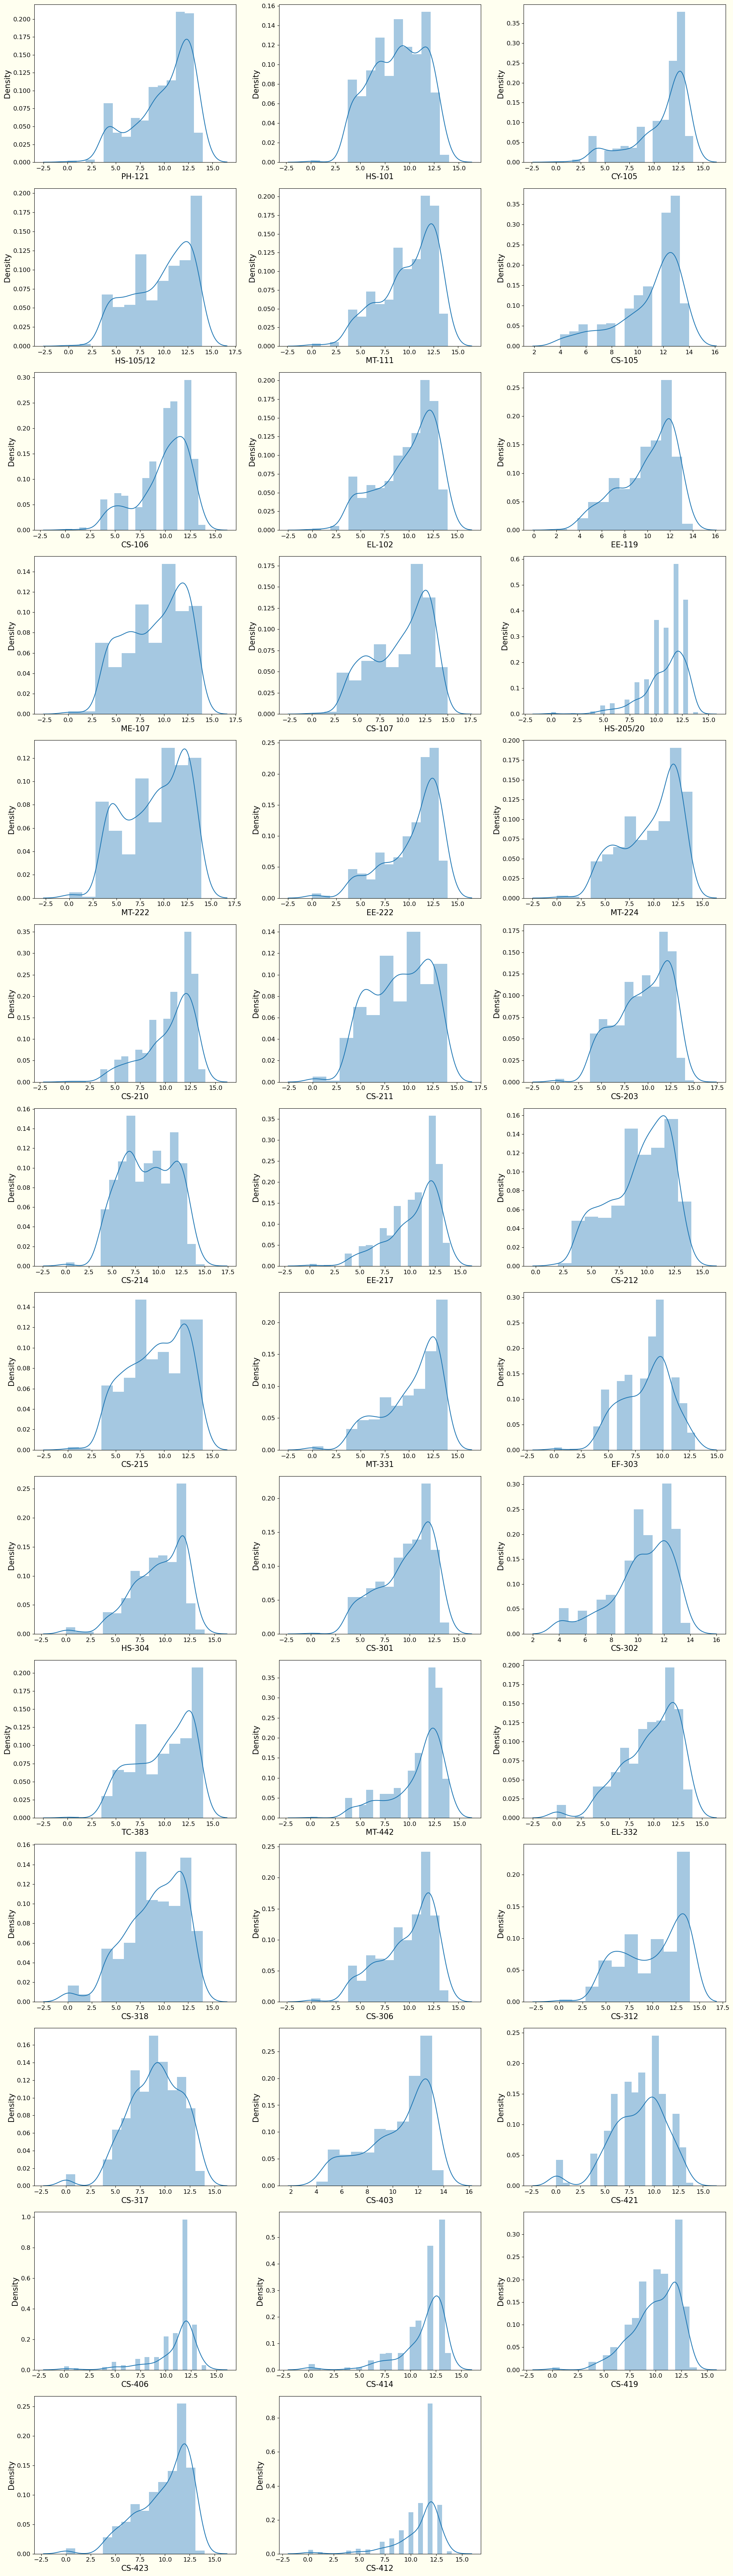

In [18]:
# Looking for distribution plot in the dataset

plotnumber=1
width=20
height=((41//3)+1)*5
plt.figure(figsize=(width,height),facecolor="ivory")
for i in df1.columns[:-1]:
    if plotnumber<=41:
        plt.subplot(14,3,plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize=15)
        plt.ylabel("Density", fontsize=15)
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

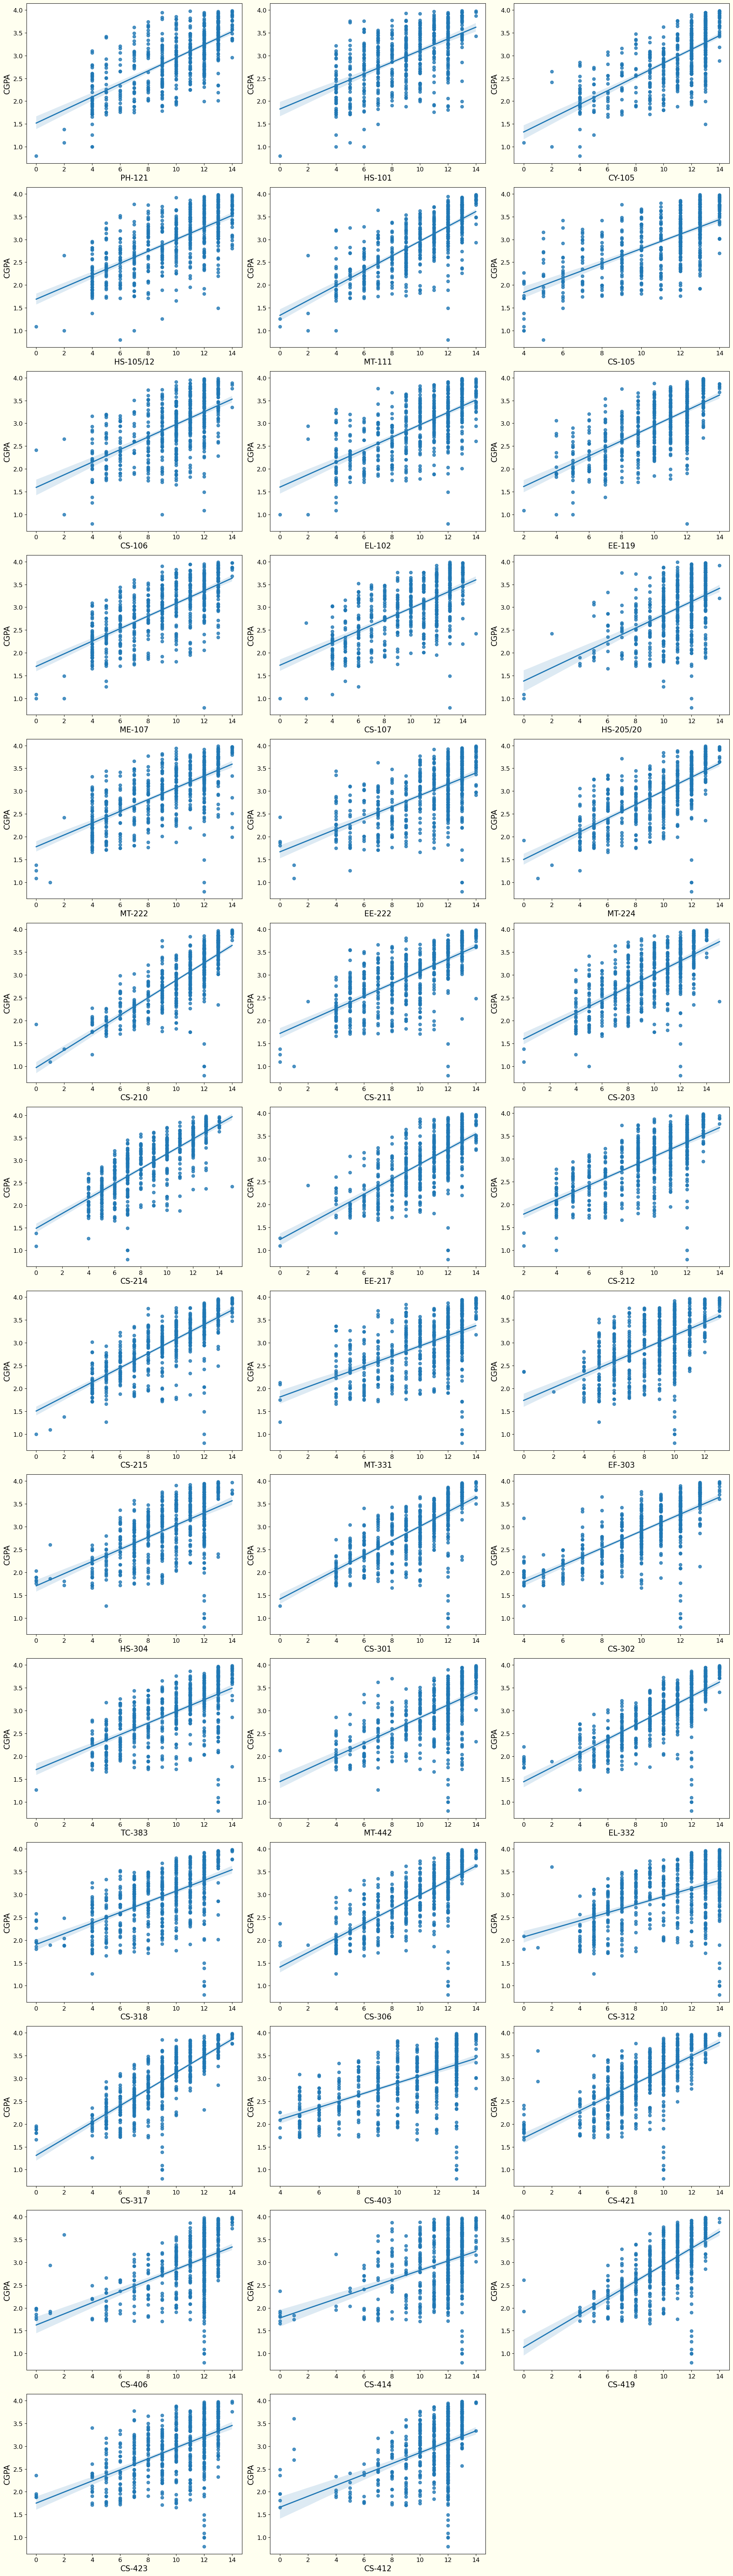

In [19]:
# checking distribution of data in each column with respect to CGPA
plotnumber=1
width=20
height=((41//3)+1)*5
plt.figure(figsize=(width,height),facecolor="ivory")
for i in df1.columns[0:-1]:
    if plotnumber<=41:
        plt.subplot(14,3,plotnumber)
        sns.regplot(x=i, y="CGPA", data=df1)
        plt.xlabel(i, fontsize=15)
        plt.ylabel("CGPA", fontsize=15)
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.tight_layout()

All the subject grade score is positively correlative with CGPA. 

In [21]:
#Checking correlation
df1.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.414476  0.628851   0.551090  0.493672  0.673455   
HS-101     0.414476  1.000000  0.366062   0.490167  0.460485  0.447147   
CY-105     0.628851  0.366062  1.000000   0.588159  0.581758  0.619542   
HS-105/12  0.551090  0.490167  0.588159   1.000000  0.528381  0.542534   
MT-111     0.493672  0.460485  0.581758   0.528381  1.000000  0.439905   
CS-105     0.673455  0.447147  0.619542   0.542534  0.439905  1.000000   
CS-106     0.305955  0.361427  0.403077   0.522748  0.539239  0.301876   
EL-102     0.424861  0.373216  0.486298   0.376041  0.579011  0.367704   
EE-119     0.649283  0.315363  0.541987   0.458259  0.452667  0.591015   
ME-107     0.566001  0.358203  0.478667   0.382041  0.497068  0.498614   
CS-107     0.506332  0.516533  0.497680   0.562972  0.506447  0.537838   
HS-205/20  0.323862  0.198827  0.320256   0.224899  0.361094  0.215201   
MT-222     0.561357  0.413202  0.511512   0.501465  0.533516  0.513681   
EE-222     0.541455  0.401342  0.437838   0.407068  0.400996  0.509556   
MT-224     0.346347  0.263644  0.426100   0.417184  0.590170  0.268666   
CS-210     0.518303  0.355614  0.504341   0.508066  0.628933  0.455939   
CS-211     0.353921  0.349833  0.488287   0.403680  0.574873  0.389557   
CS-203     0.475707  0.281500  0.403566   0.334819  0.531175  0.441960   
CS-214     0.448251  0.497120  0.511026   0.452791  0.598169  0.479865   
EE-217     0.445340  0.367480  0.442513   0.406069  0.565521  0.383447   
CS-212     0.378880  0.367266  0.456902   0.516350  0.601380  0.363767   
CS-215     0.519096  0.435685  0.559541   0.513707  0.589141  0.499303   
MT-331     0.204698  0.169496  0.364464   0.291942  0.427557  0.254075   
EF-303     0.231254  0.254154  0.351661   0.436980  0.452967  0.230803   
HS-304     0.466834  0.438147  0.371893   0.364939  0.324819  0.497612   
CS-301     0.320327  0.318923  0.377018   0.463305  0.571776  0.270676   
CS-302     0.462526  0.378706  0.456281   0.473946  0.522255  0.466587   
TC-383     0.194596  0.353213  0.297394   0.438492  0.536802  0.229710   
MT-442     0.477019  0.269294  0.445242   0.363915  0.420755  0.457933   
EL-332     0.403449  0.411715  0.368889   0.393753  0.573259  0.373619   
CS-318     0.439422  0.444871  0.337437   0.384060  0.370304  0.455479   
CS-306     0.468696  0.453817  0.391063   0.523700  0.487341  0.434749   
CS-312     0.004442  0.231876  0.234378   0.275336  0.476485  0.044082   
CS-317     0.496167  0.413454  0.489859   0.504438  0.578820  0.417529   
CS-403     0.333422  0.250920  0.483422   0.498570  0.424357  0.290992   
CS-421     0.345800  0.338478  0.371790   0.432015  0.528920  0.288815   
CS-406     0.282625  0.313170  0.154938   0.204157  0.290987  0.257851   
CS-414     0.187749  0.267912  0.069426   0.141447  0.250140  0.159629   
CS-419     0.443948  0.286610  0.432948   0.473822  0.510407  0.333288   
CS-423     0.091375  0.241912  0.119327   0.240871  0.387042  0.062626   
CS-412     0.243307  0.251373  0.046301   0.150330  0.266859  0.174189   
CGPA       0.683620  0.564779  0.686935   0.659416  0.751912  0.644594   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.305955  0.424861  0.649283  0.566001  ...  0.004442  0.496167   
HS-101     0.361427  0.373216  0.315363  0.358203  ...  0.231876  0.413454   
CY-105     0.403077  0.486298  0.541987  0.478667  ...  0.234378  0.489859   
HS-105/12  0.522748  0.376041  0.458259  0.382041  ...  0.275336  0.504438   
MT-111     0.539239  0.579011  0.452667  0.497068  ...  0.476485  0.578820   
CS-105     0.301876  0.367704  0.591015  0.498614  ...  0.044082  0.417529   
CS-106     1.000000  0.354877  0.272645  0.300779  ...  0.469329  0.418189   
EL-102     0.354877  1.000000  0.438535  0.464083  ...  0.329453  0.472246   
EE-119     0.272645  0.438535  1.000000  0.611852  ...  0.151611  0.477166   
ME-107     0.300779  0.464083  0.611852  1.000000 

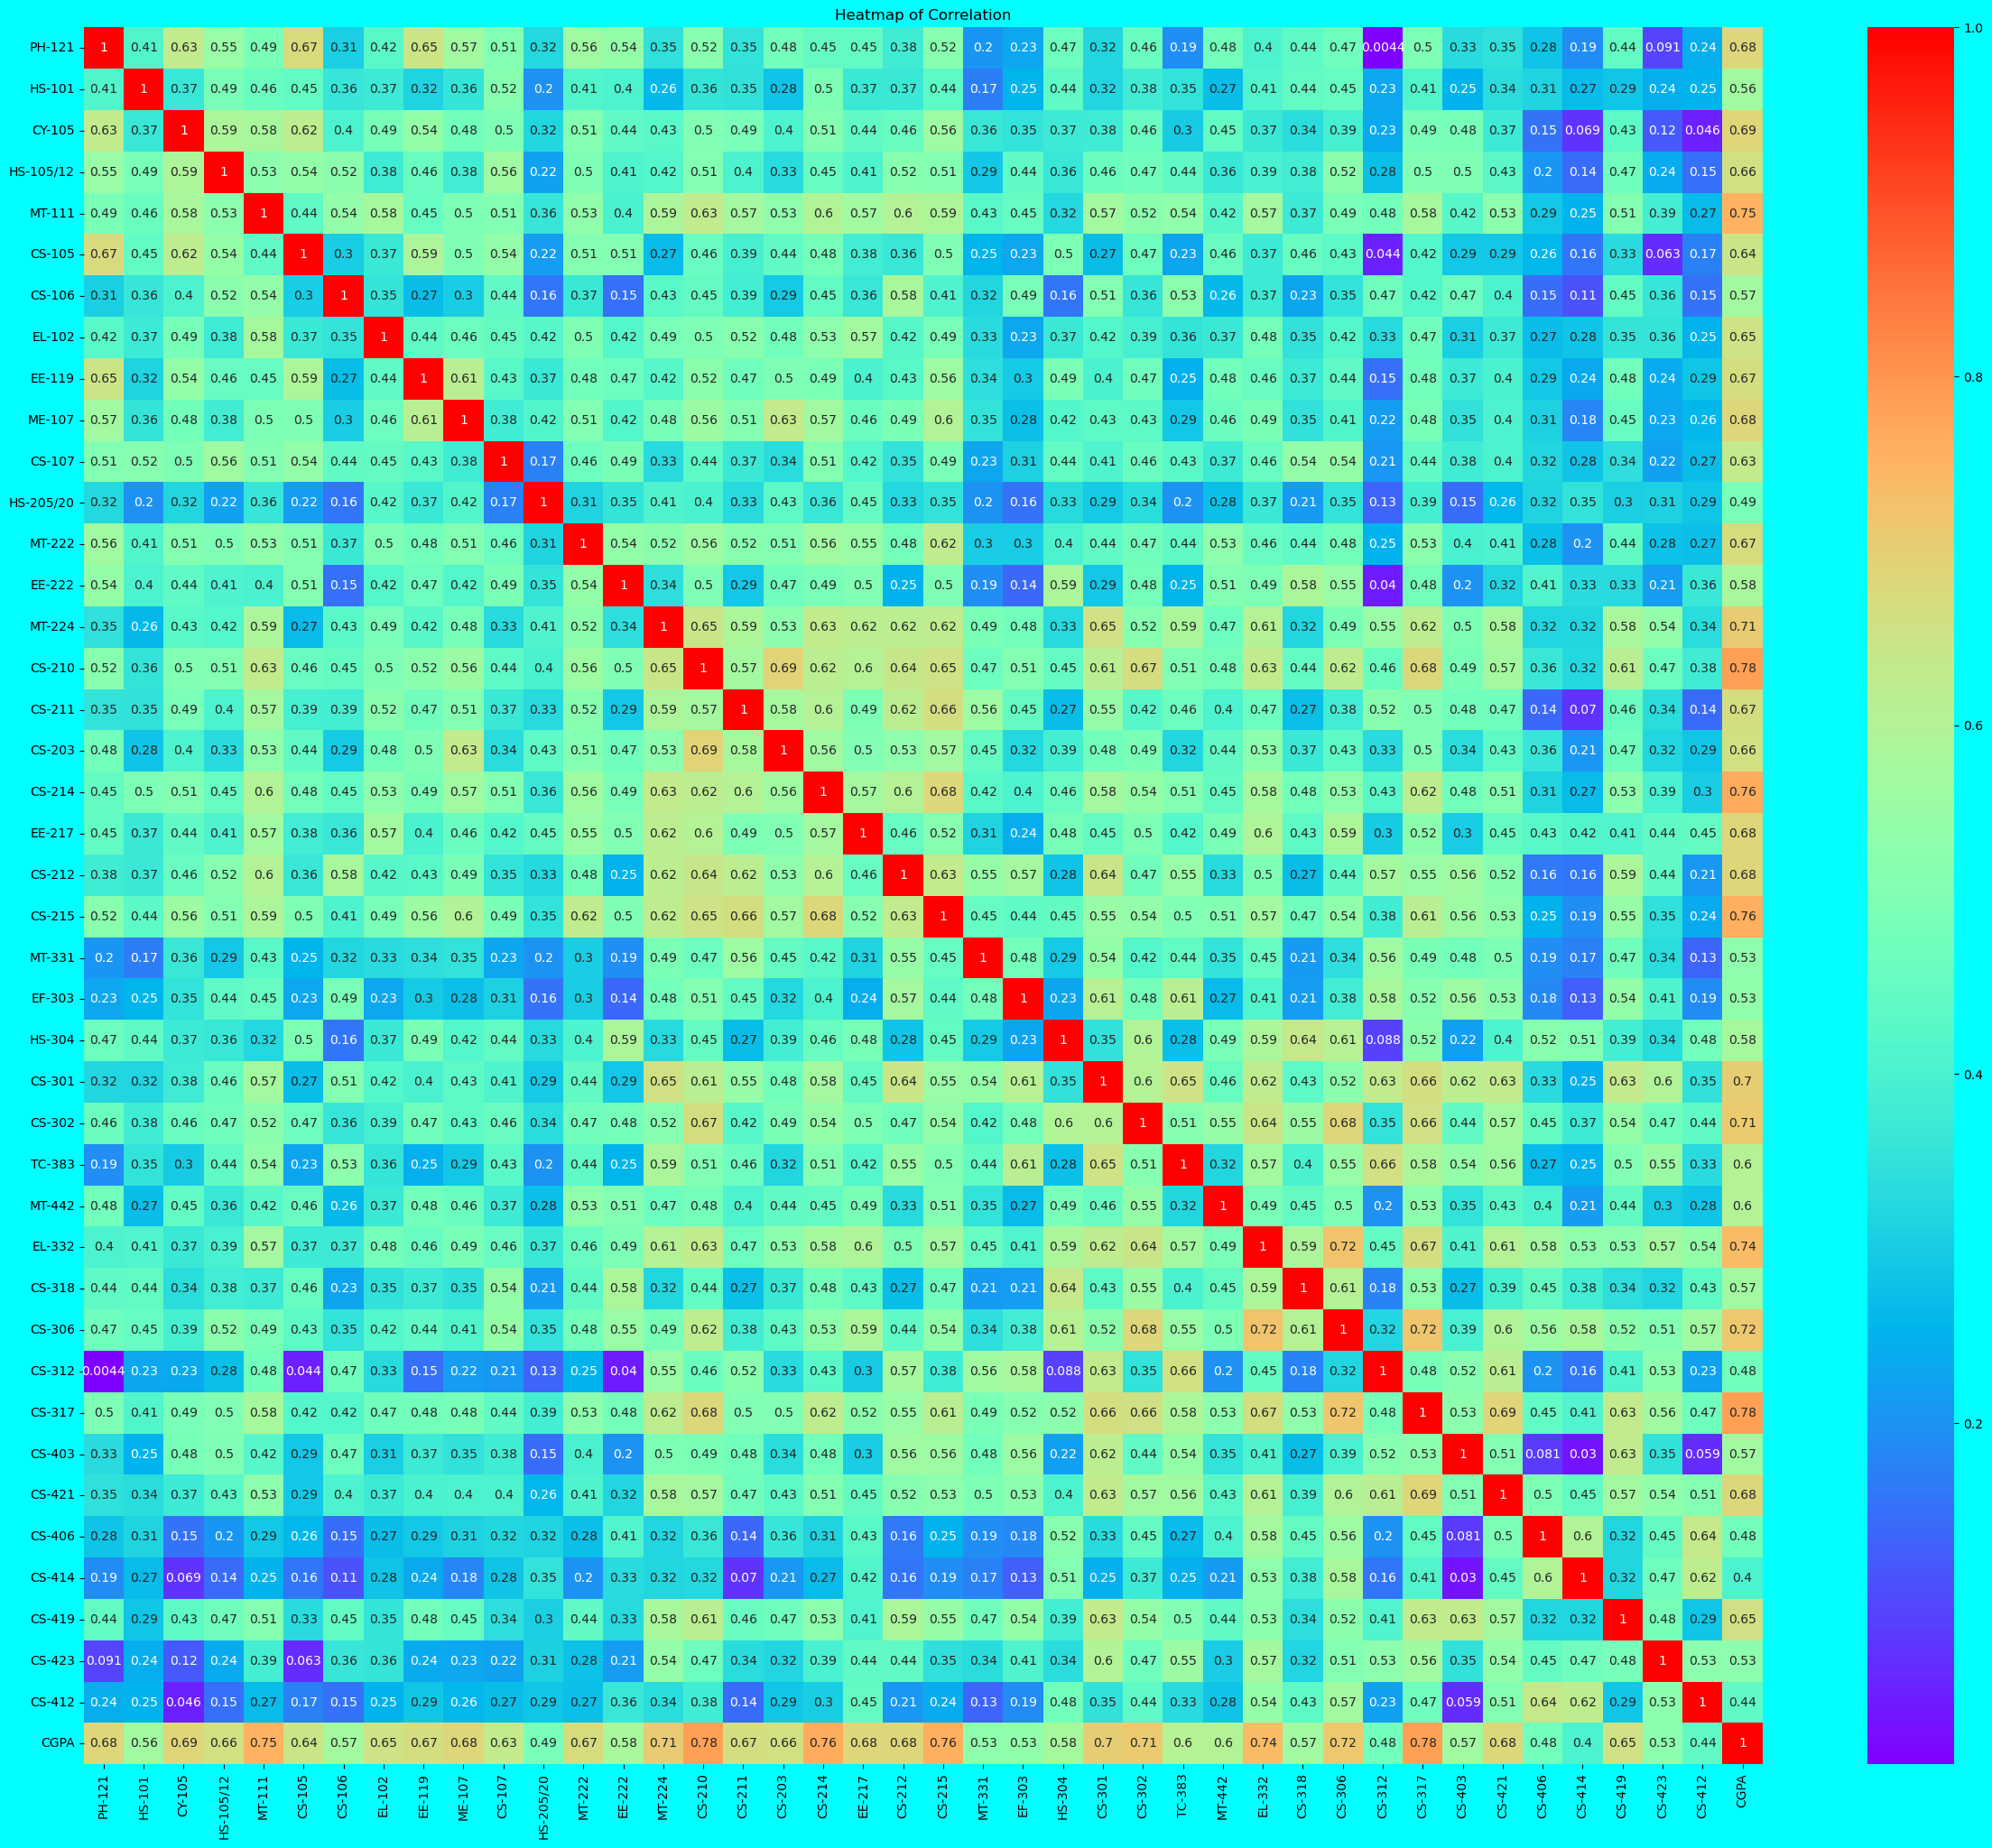

In [22]:
# visualize correlation
plt.figure(figsize=(30,25), facecolor='cyan')
sns.heatmap(df1.corr(), annot=True,cmap='rainbow')
plt.title("Heatmap of Correlation")
plt.show()

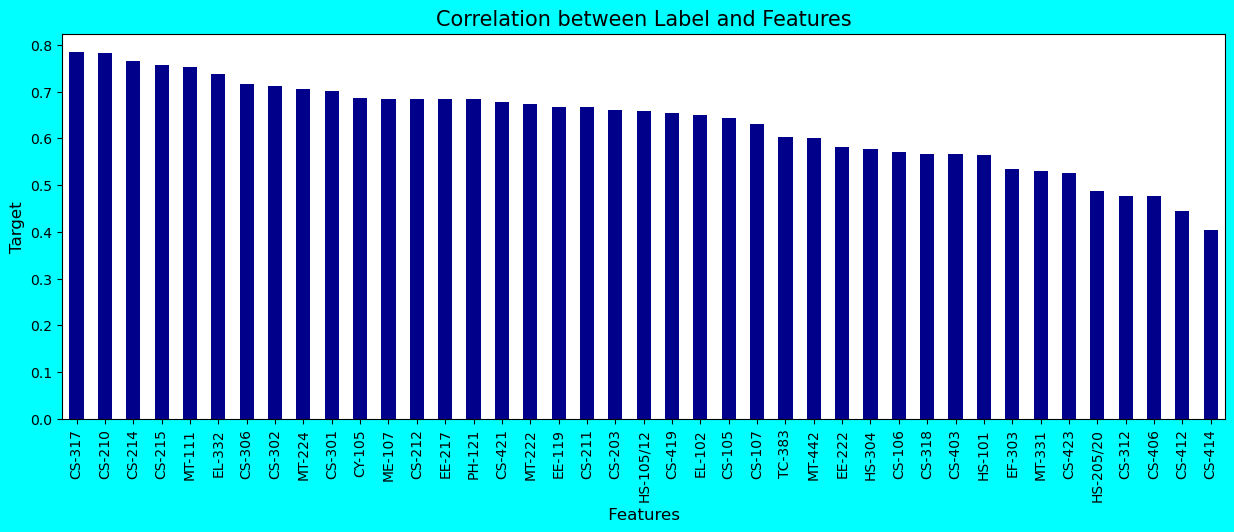

In [23]:
# Visualizing the correlation between label and features using barplot
plt.figure(figsize=(15,5),facecolor="cyan")
df1.corr()["CGPA"].sort_values(ascending=False).drop(['CGPA']).plot(kind="bar", color='darkblue')
plt.title("Correlation between Label and Features", fontsize=15)
plt.xlabel(" Features ", fontsize=12)
plt.ylabel("Target", fontsize=12)
plt.show()

From the correlation of the dataset we can notice that all the column is positively correlated with target variable. In the bar graph we can notice that which subject is more positively correlated with each other. As all the Features are having ordinal data hence we do not need to check outliers for each column.

## Feature Engineering

In [24]:
# Seperating features and label 
x=df1.drop("CGPA", axis=1)
y=df1['CGPA']

In [25]:
# Checking the dimension of label and features
print("Frature dimension=",x.shape)
print("Label dimension=",y.shape)

Frature dimension= (571, 41)
Label dimension= (571,)


In [26]:
# feature scaling with Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0   -0.345535 -1.390346 -1.702864  -0.847428 -1.381679 -2.399165 -2.276839   
1    1.005839 -1.755856 -2.057085  -1.809419 -0.336727 -1.598742 -2.276839   
2    1.005839  0.437204  0.776680  -0.206101  0.359908  0.802525 -0.327116   
3   -2.034753 -0.293816 -2.057085  -1.809419 -2.078314  0.402314 -1.886895   
4    0.667995  1.168224  0.422459   0.435226  1.056542  0.802525  0.842717   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.007692  1.533733  0.776680   0.755890  1.404860  0.802525  0.842717   
567  1.343683  1.533733  0.776680   1.076554  1.056542  0.802525  1.232662   
568 -0.007692  1.533733  0.422459   0.435226  1.056542  0.802525  1.232662   
569  1.005839  0.802714 -2.411305   1.076554 -2.078314 -2.399165 -0.327116   
570 -1.021222 -1.755856 -2.411305  -0.847428 -1.033362 -2.399165  0.062828   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0   -1.326853 -0.412828 -0.997408  ... -0.990018 -1.196489 -1.135413   
1    1.039694 -2.027381 -1.647917  ... -2.058639 -1.496004 -1.882326   
2    0.363538  0.798087  0.954117  ...  0.791016  0.001574  0.358414   
3   -1.326853 -2.431020 -0.346900  ... -1.346225 -1.496004 -0.761956   
4    0.363538  1.201725  0.954117  ...  0.791016 -0.297942  0.731870   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.701616  1.605364  0.628863  ...  0.434809  0.600605  1.105327   
567  0.701616  1.201725  1.279371  ...  0.791016  0.301089  0.731870   
568  1.039694  1.201725  0.303609  ...  0.434809  0.600605  0.358414   
569 -1.326853 -0.412828 -0.997408  ...  0.434809 -1.795520  0.358414   
570 -0.650697 -1.220105 -1.322662  ... -1.702432 -0.597457 -0.761956   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0   -1.682619 -0.864898  0.459345  0.713486 -1.807475  0.037211  0.509386  
1   -1.300753 -1.577021  0.459345 -0.949373 -1.361464 -1.081080 -0.358851  
2    0.990445 -0.508837  0.872394  0.713486  1.314598  0.782738  0.943505  
3   -2.064485 -0.864898 -0.779802 -0.533658 -0.915454 -0.708316 -1.227089  
4    0.226712  0.203285  0.459345  0.713486  0.868588  0.782738  0.943505  
..        ...       ...       ...       ...       ...       ...       ...  
566  0.990445  1.627531  0.872394 -0.117944  0.422577  0.037211  0.943505  
567  0.990445  1.627531  0.459345 -0.533658  0.868588 -1.081080  0.509386  
568  0.990445  0.915408  0.872394 -1.780803  0.422577  0.782738  0.509386  
569 -0.155154 -0.864898 -2.845046 -1.780803 -0.023433 -0.335553 -1.661207  
570 -0.537020 -1.577021 -4.497241 -2.196518  0.422577 -2.199371 -2.095326  

[571 rows x 41 columns]

In [27]:
#checking the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif

Features  VIF Values
0      PH-121    3.366480
1      HS-101    1.943105
2      CY-105    2.943560
3   HS-105/12    2.649570
4      MT-111    2.972083
5      CS-105    2.803890
6      CS-106    2.131811
7      EL-102    2.126230
8      EE-119    2.565023
9      ME-107    2.489271
10     CS-107    2.459765
11  HS-205/20    1.695962
12     MT-222    2.448063
13     EE-222    2.562918
14     MT-224    3.325404
15     CS-210    3.822517
16     CS-211    3.019090
17     CS-203    2.899740
18     CS-214    2.974665
19     EE-217    2.859164
20     CS-212    3.276436
21     CS-215    3.422076
22     MT-331    2.176191
23     EF-303    2.417561
24     HS-304    2.945387
25     CS-301    3.628830
26     CS-302    3.008780
27     TC-383    3.309828
28     MT-442    2.156677
29     EL-332    3.683359
30     CS-318    2.586474
31     CS-306    4.284518
32     CS-312    3.836851
33     CS-317    3.827964
34     CS-403    2.806056
35     CS-421    3.304568
36     CS-406    2.520778
37     CS-414    2.839709
38     CS-419    2.812556
39     CS-423    2.653203
40     CS-412    2.708839

VIF value for every column is less than 10. hence need not to drop any column.

### Model Preparation

In [28]:
# importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [29]:
# Finding the best Random State
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print(f"Maximum r2score is {maxAccu} is at {maxRS}")

Maximum r2score is 0.969618606925304 is at 42


In [30]:
#Spliting the dataset into train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)
print(f"The shape of training data is {x_train.shape} and \nThe shape of test data is {x_test.shape}.")

The shape of training data is (399, 41) and 
The shape of test data is (172, 41).


#### Checking the best r2 score for each model

In [31]:
# Linear Regressor
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(lr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_lr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_lr)))
print("r squared score=",r2_score(y_test,pred_lr))

LinearRegression()
Mean Absolute Error= 0.07796608528723271
Mean Squared Error= 0.010295461464071207
Root Mean Squared Error= 0.10146655342560526
r squared score= 0.969618606925304


In [32]:
# Hyperparameter tuning for lasso regressor
parameter={'alpha':[0.001,0.01,0.1],
           "random_state":[10,20,50,100]}
gsv=GridSearchCV(Lasso(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'alpha': 0.01, 'random_state': 10}

In [33]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [34]:
# Lasso regularization
ls=Lasso(alpha=0.001, random_state=10)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print(ls)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_ls))
print("Mean Squared Error=", mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_ls)))
print("r squared score=",r2_score(y_test,pred_ls))

Lasso(alpha=0.001, random_state=10)
Mean Absolute Error= 0.07638733230570291
Mean Squared Error= 0.009835593227879108
Root Mean Squared Error= 0.09917455937829574
r squared score= 0.9709756551445681


In [35]:
# Hyper parameter tuning for Ridge Regularisation
parameter={'alpha':[0.001,0.01,0.1],
           'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
           "random_state":[10,20,50,100]}
gsv=GridSearchCV(Ridge(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'alpha': 0.1, 'random_state': 20, 'solver': 'saga'}

In [36]:
# Ridge Regularization
rg=Ridge(alpha=0.1, random_state=20,solver='saga')
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print(rg)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rg))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rg))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rg)))
print("r squared score=",r2_score(y_test,pred_rg))

Ridge(alpha=0.1, random_state=20, solver='saga')
Mean Absolute Error= 0.07794781032139089
Mean Squared Error= 0.010282610034203558
Root Mean Squared Error= 0.10140320524620293
r squared score= 0.9696565308536041


In [37]:
# Hyper parameter Tuning for Gradient Boosting Regressor
parameter={'alpha':[0.001,0.01,0.1],
           'max_features':['sqrt','log2'],
           "max_depth":[1,10,20],
           'random_state':[10,20,50]}
gsv=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'alpha': 0.001, 'max_depth': 20, 'max_features': 'log2', 'random_state': 10}

In [38]:
# Gradient Boosting regressor
gbr=GradientBoostingRegressor(alpha=0.001, max_depth=20, max_features='log2',random_state=10)
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print(gbr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_gbr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_gbr)))
print("r squared score=",r2_score(y_test,pred_gbr))

GradientBoostingRegressor(alpha=0.001, max_depth=20, max_features='log2',
                          random_state=10)
Mean Absolute Error= 0.0890900369730736
Mean Squared Error= 0.017401418093006396
Root Mean Squared Error= 0.13191443474088194
r squared score= 0.9486492834744976


In [39]:
# Hyper parameter Tuning for RandomForestRegressor
parameter={'n_estimators':[10,50,100], 
           "criterion":['squared_error','absolute_error'],
           "max_depth":[1,10,20],
           'random_state':[10,20,50]}
gsv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'n_estimators': 100,
 'random_state': 20}

In [40]:
# Random Forest Regressor
rfr=RandomForestRegressor(criterion='squared_error',max_depth=20, n_estimators=100,random_state=20)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print(rfr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rfr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rfr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rfr)))
print("r squared score=",r2_score(y_test,pred_rfr))

RandomForestRegressor(max_depth=20, random_state=20)
Mean Absolute Error= 0.09330156976744182
Mean Squared Error= 0.016752205955232528
Root Mean Squared Error= 0.1294303131234431
r squared score= 0.950565076099763


In [41]:
# Hyper parameter Tuning for ExtraTreesRegressor
parameter={'n_estimators':[10,50,100], 
           "criterion":['squared_error','absolute_error'],
           "max_depth":[1,10,20],
           'random_state':[10,20,50]}
gsv=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 20,
 'n_estimators': 100,
 'random_state': 20}

In [42]:
# Extra Trees Regressor
etr=ExtraTreesRegressor(criterion='absolute_error', max_depth=20, n_estimators=100, random_state=20)
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print(etr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_etr)))
print("r squared score=",r2_score(y_test,pred_etr))

ExtraTreesRegressor(criterion='absolute_error', max_depth=20, random_state=20)
Mean Absolute Error= 0.08343005813953486
Mean Squared Error= 0.01615428675581394
Root Mean Squared Error= 0.12709951516750148
r squared score= 0.9523295058232715


In [43]:
# Hyper parameter Tuning for AdaBoostRegressor
parameter={'n_estimators':[10,50,100], 
           "learning_rate":[1,10,20], 
           "loss":['linear', 'square', 'exponential'],
           'random_state':[10,20,50]}
gsv=GridSearchCV(AdaBoostRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 50,
 'random_state': 20}

In [44]:
# Ada Boost Regressor
adr=AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=50, random_state=20)
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
print(adr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_adr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_adr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_adr)))
print("r squared score=",r2_score(y_test,pred_adr))

AdaBoostRegressor(learning_rate=1, loss='exponential', random_state=20)
Mean Absolute Error= 0.15017966149916992
Mean Squared Error= 0.034650245731987044
Root Mean Squared Error= 0.1861457647436198
r squared score= 0.897748853765121


In [45]:
# Hyperparameter tuning for DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "max_depth" : [1,5,10], 
            "min_samples_leaf":[2,3,4,5], 
            "max_features":["auto","log2","sqrt"] }
gsv=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [46]:
# Decision Tree Regressor
dtr=DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features= 'auto', min_samples_leaf=2, splitter='random')
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print(dtr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_dtr)))
print("r squared score=",r2_score(y_test,pred_dtr))

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      splitter='random')
Mean Absolute Error= 0.19130412676698583
Mean Squared Error= 0.0792642683523957
Root Mean Squared Error= 0.2815391062577199
r squared score= 0.7660950990884439


From all of the model that we have performend with hyper parameter tuning we found that Lasso() model give us the best result as r2score is maximum at for this dataset.

In [47]:
# Final model selection 
final_model=Lasso(alpha=0.001, random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred))
print("Mean Squared Error =",mean_squared_error(y_test,pred))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(y_test,pred)))
print("R Squared Score", r2_score(y_test,pred))

Mean Absolute Error= 0.07638733230570291
Mean Squared Error = 0.009835593227879108
Root Mean Squared Error = 0.09917455937829574
R Squared Score 0.9709756551445681


In [48]:
#Saving The best performing model
import joblib
joblib.dump(final_model,"student_grade.pkl")

['student_grade.pkl']

In [49]:
# Loading the model and predicting values
load_model=joblib.load("student_grade.pkl")
prediction=load_model.predict(x_test)
std_df=pd.DataFrame()
std_df['Actual Value']=y_test
std_df["Predicted Value"]= prediction
std_df

Actual Value  Predicted Value
509         1.992         2.250774
70          3.490         3.500221
131         2.823         2.821610
512         2.288         2.415312
542         3.816         3.818406
..            ...              ...
69          3.578         3.496696
255         1.764         1.621989
177         3.369         3.461333
284         3.919         3.974513
563         2.612         2.688833

[172 rows x 2 columns]

We can observe that the actual value is nearly close to the predicted value.